<a href="https://colab.research.google.com/github/NancyMerciline/House-Pricing-Prediction-Bangalore/blob/main/Bangalore_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv("/content/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape

(13320, 9)

In [ ]:
data.info

<bound method DataFrame.info of                  area_type   availability                  location  \
0      Super built-up Area         19-Dec  Electronic City Phase II   
1                Plot Area  Ready To Move          Chikka Tirupathi   
2            Built-up Area  Ready To Move               Uttarahalli   
3      Super built-up Area  Ready To Move        Lingadheeranahalli   
4      Super built-up Area  Ready To Move                  Kothanur   
...                    ...            ...                       ...   
13315        Built-up Area  Ready To Move                Whitefield   
13316  Super built-up Area  Ready To Move             Richards Town   
13317        Built-up Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up Area         18-Jun           Padmanabhanagar   
13319  Super built-up Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0  

In [ ]:
data.describe

<bound method NDFrame.describe of                  area_type   availability                  location  \
0      Super built-up Area         19-Dec  Electronic City Phase II   
1                Plot Area  Ready To Move          Chikka Tirupathi   
2            Built-up Area  Ready To Move               Uttarahalli   
3      Super built-up Area  Ready To Move        Lingadheeranahalli   
4      Super built-up Area  Ready To Move                  Kothanur   
...                    ...            ...                       ...   
13315        Built-up Area  Ready To Move                Whitefield   
13316  Super built-up Area  Ready To Move             Richards Town   
13317        Built-up Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up Area         18-Jun           Padmanabhanagar   
13319  Super built-up Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


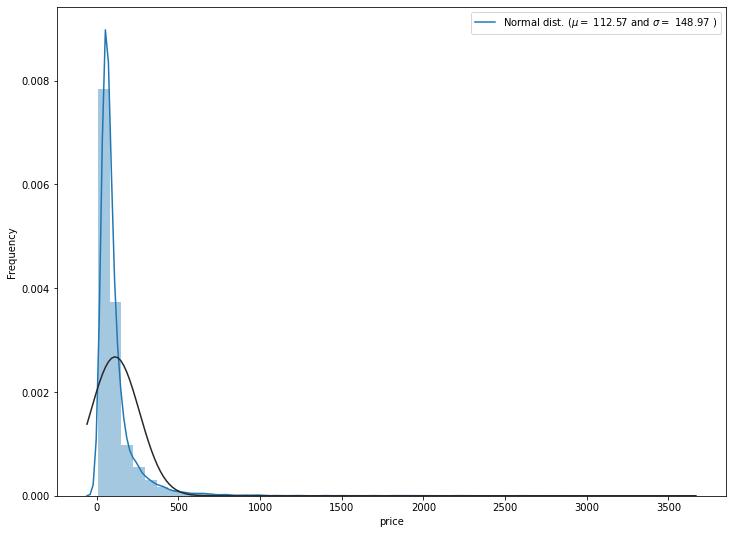

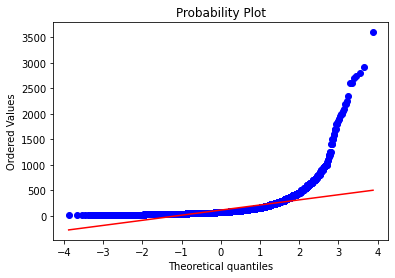

In [ ]:
plt.subplots(figsize=(12,9))
sns.distplot(data['price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data['price'], plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


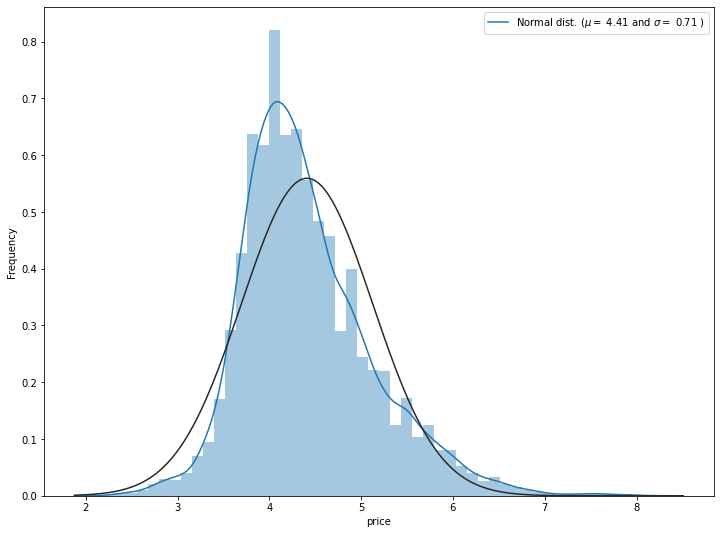

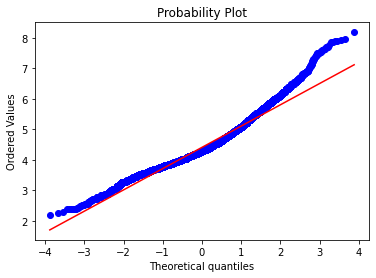

In [ ]:
#we use log function which is in numpy
data['price'] = np.log1p(data['price'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(data['price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data['price'], plot=plt)
plt.show()

In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
data.isnull().sum().sum()

6201

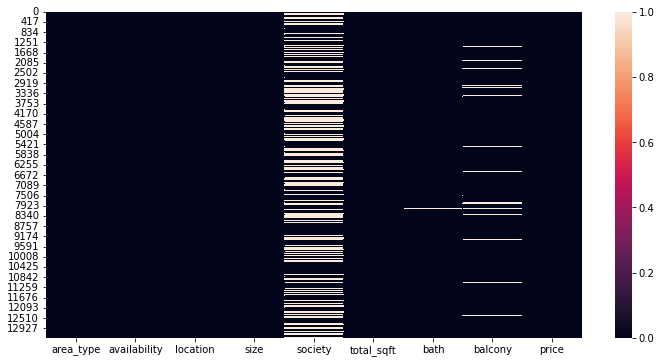

In [ ]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

In [ ]:
#Data clean: handle null values
data = data.dropna()

In [ ]:
data.area_type.unique()

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

In [ ]:
#drop availability because it's not required 
data = data.drop('availability',axis=1)

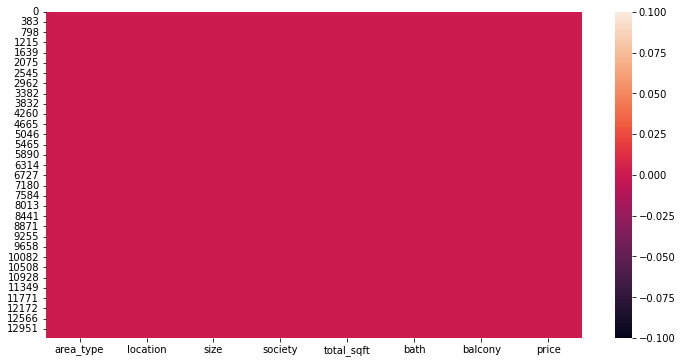

In [ ]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

all missing values Removed

## Corralation between train attributes

In [ ]:
train_corr = data.select_dtypes(include=[np.number])

In [ ]:
train_corr.shape

(7496, 3)

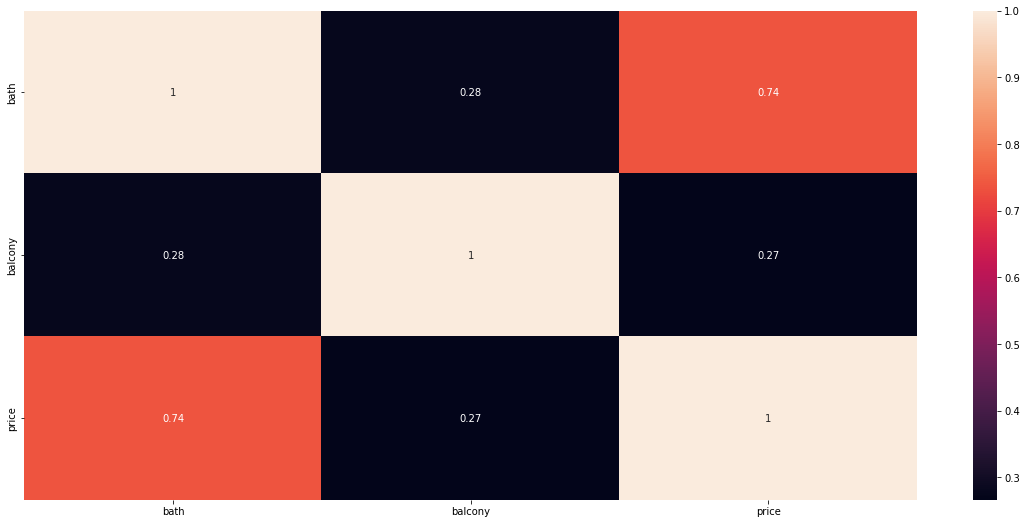

In [ ]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

## Top 50% Corralation train attributes with sale-price

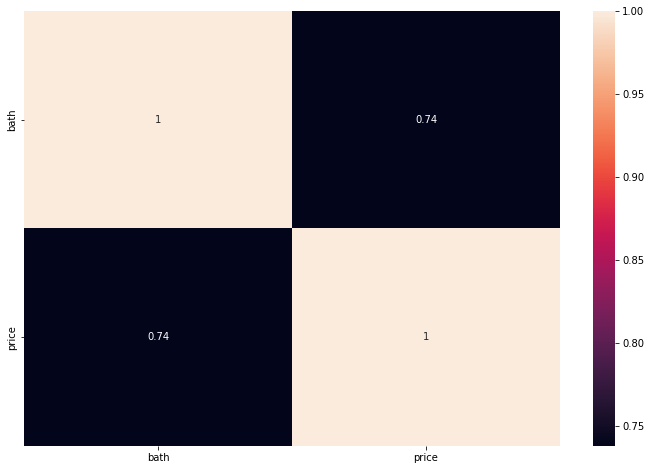

In [ ]:
top_feature = corr.index[abs(corr['price']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [ ]:
# col = ['total_sqft', 'bath', 'price', 'bhk']
# sns.set(style='ticks')
# sns.pairplot(data[col], size=3, kind='reg')

In [ ]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', ' Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Kundalahalli', 'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Cholanayakanahalli', 'Kodanda Reddy Layout',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Kengeri', 'Yeshwanthpur', 'Chandapura', 'Kothanur',
       'Green View Layout', 'Shantiniketan Layout', 'Rajaji Nagar',
       'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout

In [ ]:
len(data.location.unique())

634

In [ ]:
location_count = data.groupby('location').size().sort_values(ascending=False)
location_count

location
Whitefield                        397
Sarjapur  Road                    310
Electronic City                   236
Kanakpura Road                    216
Thanisandra                       212
                                 ... 
Kalhalli                            1
 Bhoganhalli                        1
KSRTC Layout                        1
KR Garden                           1
Yeshwanthpur Industrial Suburb      1
Length: 634, dtype: int64

In [ ]:
len(location_count[location_count<=10])

491

In [ ]:
location_less_10 = location_count[location_count<=10]

In [ ]:
#if the location have less than 10 or 10 houses than that location are known as other location
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [ ]:
len(data.location.unique())

144

In [ ]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique() 

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,3.690628,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,4.795791,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,4.564348,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,3.663562,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,5.690359,4


In [ ]:
#drop society column because it's not required
data = data.drop('society',axis=1)

In [ ]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,3.690628,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,4.795791,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,4.564348,3
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,3.663562,2
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,5.690359,4


In [ ]:
#create new column price_sqft that contain price per sqft
data['price_sqft'] = data.price*100000/data.total_sqft

In [ ]:
#remove outlier using standard deviation
upper_limit = data.price_sqft.mean() + data.price_sqft.std()
lower_limit = data.price_sqft.mean() - data.price_sqft.std()
data = data[data.price_sqft<upper_limit] 
data = data[data.price_sqft > lower_limit]

In [ ]:
#remove 2BHK house that price per sqft is less than the mean of 1bhk house price
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)

In [ ]:
data = data.drop('price_sqft',axis=1)

In [ ]:
#apply one hot encoding in location column
dummies = pd.get_dummies(data.location)
location_cat = pd.get_dummies(data.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.concat([data,dummies.drop('1st Phase JP Nagar',axis='columns')],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,3.690628,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,4.795791,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,4.564348,3,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,3.663562,2,0,1,...,0,0,0,0,0,0,0,0,0,0
15,Super built-up Area,Mysore Road,2 BHK,1175.0,2.0,2.0,4.310799,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#apply one hot encoding in area column
dummies = pd.get_dummies(data.area_type)
dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
3,0,0,0,1
12,0,0,0,1
15,0,0,0,1


In [ ]:
data = pd.concat([data,dummies],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,3.690628,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,4.795791,4,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,4.564348,3,0,0,...,0,0,0,0,0,0,0,0,0,1
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,3.663562,2,0,1,...,0,0,0,0,0,0,0,0,0,1
15,Super built-up Area,Mysore Road,2 BHK,1175.0,2.0,2.0,4.310799,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data = data.drop(['location','size','area_type'] , axis=1)

In [ ]:
data.head()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,3.690628,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2600.0,5.0,3.0,4.795791,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1521.0,3.0,1.0,4.564348,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1000.0,2.0,1.0,3.663562,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15,1175.0,2.0,2.0,4.310799,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#split data into dependent feature & independent feature
X = data.drop('price',axis=1)

In [ ]:
y=data['price']

In [ ]:
#split data into train-test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.74927915, 0.74170747, 0.78223126, 0.78800651, 0.77914485])

In [ ]:
np.average(regressor)

0.7680738489304175

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.21227374452135894
0.08700919872738042
0.2949732169661856


In [ ]:
linear = model.score(x_train, y_train)*100
print("Linear Accuracy --> ", linear)

Linear Accuracy -->  81.06283581259551


## RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train , y_train)

RandomForestRegressor()

In [ ]:
random_forest = model.score(x_train, y_train)*100
print("Random forest Accuracy --> ", random_forest )

Random forest Accuracy -->  96.91583065364591


## GradientBoostingRegressor

In [ ]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [ ]:
Grb = GBR.score(x_test, y_test)*100
print("Accuracy --> ", Grb)

Accuracy -->  81.02515868145478


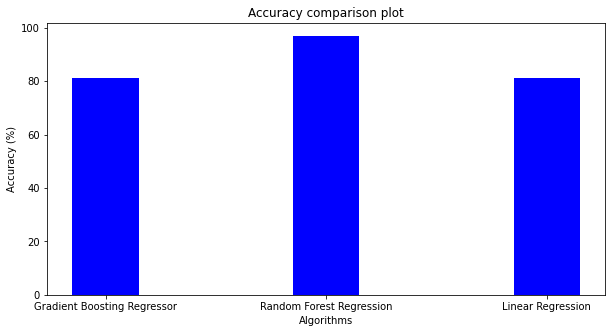

In [ ]:
# creating the dataset
data = {'Gradient Boosting Regressor': Grb,
        'Random Forest Regression': random_forest,
        'Linear Regression': linear }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.3)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy comparison plot")
plt.show()

## Model output

In [ ]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(model, fh)

In [ ]:
cat = data.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  

AttributeError: ignored

In [ ]:
#save the column name
location_list = list(zip(location_cat.columns,range(cat.shape[1])))

In [ ]:
with open('location_cat', 'wb') as fid:
    pickle.dump(location_list, fid,2)  

In [ ]:
def predict(location,area,size,bath,balcony,total_sqft):
    output = np.zeros(151)
    output[0] = total_sqft
    output[1] = bath
    output[2] = balcony
    output[3] = size
    
    result_location = location
    if result_location not in location_cat:
        output[146] = 1
    else:
        output[index_dict[str(location)]] = 1
    
    return model.predict([output])[0]

## Prediction with custom inputs

In [ ]:
#(location , area_type , size , bath , balcony , total_sqft)
predict('Yelahanka','Carpet Area', 3, 3, 2 ,3000)

NameError: ignored

In [ ]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 2 ,3560)

NameError: ignored

In [ ]:
predict('Yelahanka New Town' , 'Carpet Area' , 3 , 4 , 2 ,4000)

In [ ]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 3 ,2550)

In [ ]:
predict('rajkot' , 'Carpet Area' , 3 , 3 , 3 ,2550)